In [7]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


In [8]:
def load_and_preprocess_data(image_directory, target_size=(150, 150)):
    print("Loading and preprocessing data...")

    # ImageDataGenerator for rescaling and augmentation
    datagen = ImageDataGenerator(rescale=1./255)  # Rescale image pixels to range [0, 1]
    
    # Load the data using flow_from_directory
    train_data = datagen.flow_from_directory(
        image_directory,
        target_size=target_size,
        batch_size=32,
        class_mode='binary'  # Since we're doing binary classification (Normal vs Pneumonia)
    )
    
    # Print out some basic info
    print(f"Found {train_data.samples} images belonging to {len(train_data.class_indices)} classes.")
    
    return train_data

In [9]:
def split_data(train_data):
    # Since we're using flow_from_directory, it already handles shuffling.
    # Split the data into training and validation sets
    print("Splitting data into train and validation sets...")
    validation_data = train_data
    return train_data, validation_data

In [10]:
# Step 3: Build the CNN Model
def build_cnn_model(input_shape=(150, 150, 3)):
    model = Sequential()
    
    # First Conv Block
    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    
    # Second Conv Block
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    
    # Third Conv Block
    model.add(Conv2D(128, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    
    # Flatten the output and feed it into Dense layers
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(1, activation='sigmoid'))  # Binary classification (0: Normal, 1: Pneumonia)

    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

Loading and preprocessing data...
Found 5216 images belonging to 2 classes.
Found 5216 images belonging to 2 classes.
Splitting data into train and validation sets...
Model built successfully!
Training the model...


c:\Users\ayush\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
c:\Users\ayush\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 67s 408ms/step - accuracy: 0.7971 - loss: 0.4475 - val_accuracy: 0.9624 - val_loss: 0.1130
Epoch 2/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 73s 446ms/step - accuracy: 0.9485 - loss: 0.1444 - val_accuracy: 0.9461 - val_loss: 0.1263
Epoch 3/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 159s 977ms/step - accuracy: 0.9571 - loss: 0.1215 - val_accuracy: 0.9791 - val_loss: 0.0606
Epoch 4/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 182s 1s/step - accuracy: 0.9684 - loss: 0.0936 - val_accuracy: 0.9780 - val_loss: 0.0590
Epoch 5/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 185s 1s/step - accuracy: 0.9745 - loss: 0.0718 - val_accuracy: 0.9824 - val_loss: 0.0632
Epoch 6/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 106s 651ms/step - accuracy: 0.9750 - loss: 0.0716 - val_accuracy: 0.9873 - val_loss: 0.0340
Epoch 7/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 163s 1s/step - accuracy: 0.9815 - loss: 0.0564 - val_accuracy: 0.9852 - val_loss: 0.0467
Epoch 8/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 136s 835ms/step - accuracy: 0.9822 - loss: 0.04

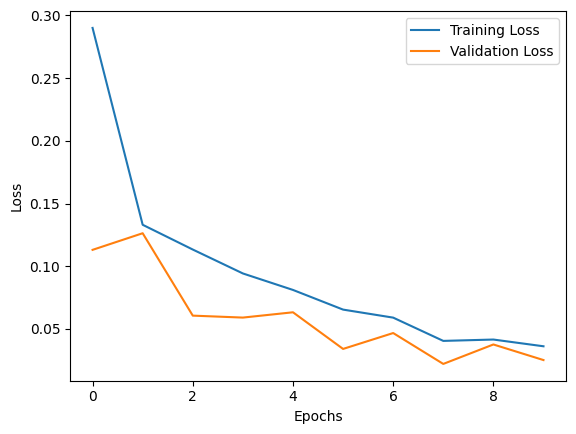

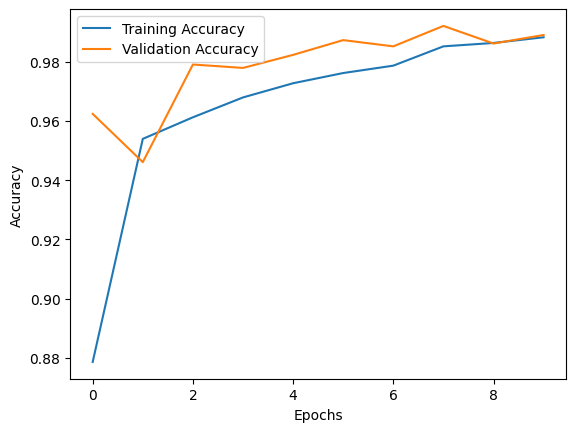

In [11]:
# Step:4 Main Execution Block
if __name__ == "__main__":
    # Load and preprocess data
    image_directory = 'C:/Users/ayush/OneDrive/Desktop/Pneumonia_casestudy/chest_xray/train'
    train_data = load_and_preprocess_data(image_directory)
    
    # Split data (if necessary, you can split into train and validation sets here)
    train_data, validation_data = split_data(train_data)

    # Build and compile the CNN model
    model = build_cnn_model()
    print("Model built successfully!")

    # Train the model
    print("Training the model...")
    history = model.fit(
        train_data,
        epochs=10,
        validation_data=validation_data
    )
    # Evaluate the model
    print("Evaluating the model on validation data...")
    val_loss, val_accuracy = model.evaluate(validation_data)
    print(f"Validation Loss: {val_loss}")
    print(f"Validation Accuracy: {val_accuracy}")

    # Visualizing training and validation loss
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

    # Visualizing training and validation accuracy
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()
